#Data Analysis made easy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

###Reading data using read_html

####read_html will be handy when you want to extract the table data from html page. read_html will result a list containing one dataframe for each table in the html page

In [2]:
auto_sales_url = "http://www.siamindia.com/statistics.aspx?mpgid=8&pgidtrail=14"
table_list = pd.read_html(auto_sales_url,header=0)
auto_sales_df = table_list[0]

In [3]:
auto_sales_df.head()

,Category,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
0,Passenger Vehicles,1951333,2501542,2629839,2665015,2503509,2601111
1,Commercial Vehicles,532721,684905,809499,793211,632851,614961
2,Three Wheelers,440392,526024,513281,538290,480085,531927
3,Two Wheelers,9370951,11768910,13409150,13797185,14806778,16004581
4,Grand Total,12295397,15481381,17361769,17793701,18423223,19752580


In [4]:
auto_sales_df = auto_sales_df.set_index("Category")

In [5]:
auto_sales_df.head()

,2009-10,2010-11,2011-12,2012-13,2013-14,2014-15
Category,,,,,,
Passenger Vehicles,1951333,2501542,2629839,2665015,2503509,2601111
Commercial Vehicles,532721,684905,809499,793211,632851,614961
Three Wheelers,440392,526024,513281,538290,480085,531927
Two Wheelers,9370951,11768910,13409150,13797185,14806778,16004581
Grand Total,12295397,15481381,17361769,17793701,18423223,19752580


In [6]:
auto_sales_df["2009-10"]

Category
Passenger Vehicles      1951333
Commercial Vehicles      532721
Three Wheelers           440392
Two Wheelers            9370951
Grand Total            12295397
Name: 2009-10, dtype: int64

In [7]:
auto_sales_df.shape

(5, 6)

In [10]:
auto_sales_df.loc["Passenger Vehicles"]

2009-10    1951333
2010-11    2501542
2011-12    2629839
2012-13    2665015
2013-14    2503509
2014-15    2601111
Name: Passenger Vehicles, dtype: int64

In [11]:
auto_sales_df.dtypes

2009-10    int64
2010-11    int64
2011-12    int64
2012-13    int64
2013-14    int64
2014-15    int64
dtype: object

In [13]:
auto_sales_df.columns

Index([u'2009-10', u'2010-11', u'2011-12', u'2012-13', u'2013-14', u'2014-15'], dtype='object')

In [14]:
auto_sales_df.index

Index([ u'Passenger Vehicles', u'Commercial Vehicles',      u'Three Wheelers',
              u'Two Wheelers',         u'Grand Total'],
      dtype='object', name=u'Category')

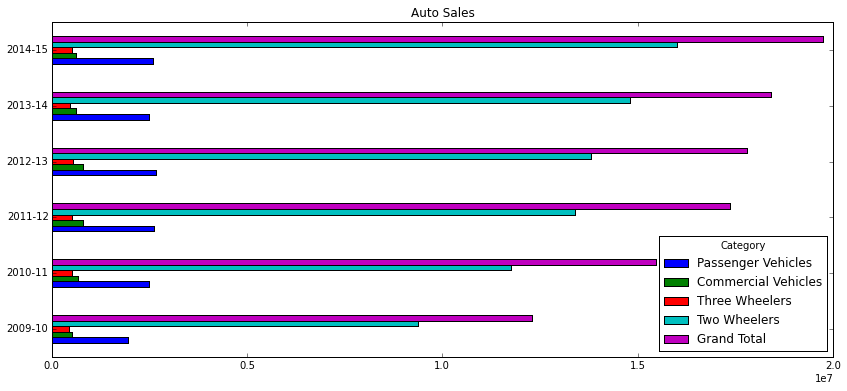

In [15]:
auto_sales_graph = auto_sales_df.T.plot(kind='barh',figsize=(14,6),title="Auto Sales")

###Reading data using read_clipboard

####somtimes if you want to bring data copied in clip board into pandas dataframe, you can use read_clipboard

In [16]:
#parse_dates=[3]
top10_funds_df = pd.read_clipboard()
top10_funds_df.head()

,Fund,Rating,Category,Launch,Expense,1-Year(Return),1-Year(Rank),Net Assets(Cr)
0,Birla Sun Life MNC Fund,Unrated,EQ-OTH,Apr-1994,2.43,26.11,0,2704
1,SBI Pharma Fund,Unrated,EQ-PH,Jul-1999,2.68,20.74,2/6,862
2,Escorts High Yield Equity Fund,Unrated,EQ-SC,Dec-2006,2.50,19.58,5/41,3
3,Motilal Oswal MOSt Focused Multicap 35 Fund - ...,Unrated,EQ-MLC,Apr-2014,2.35,19.40,2/187,2914
4,Motilal Oswal MOSt Focused Midcap 30 Fund - Re...,Unrated,EQ-MC,Feb-2014,2.63,19.28,2/78,816


In [17]:
top10_funds_df.dtypes

Fund               object
Rating             object
Category           object
Launch             object
Expense           float64
1-Year(Return)    float64
1-Year(Rank)       object
Net Assets(Cr)      int64
dtype: object

In [18]:
temp_df = pd.read_clipboard(sep=",")
temp_df

,a,b,c,d
0,1,2,3,4
1,5,6,7,8
2,9,10,11,12


In [29]:
column_names = ['Table Name','State Code','District Code','Area Name','Age',
                    'Persons-Total','Males-Total','Females-Total',
                    'Persons-Rural','Males-Rural','Females-Rural',
                    'Persons-Urban','Males-Urban','Females-Urban']
excel_df = pd.read_excel("DDW-0000C-13.xls",skiprows=6, names = column_names)
#excel_df.columns = column_names

In [30]:
excel_df.head()

,Table Name,State Code,District Code,Area Name,Age,Persons-Total,Males-Total,Females-Total,Persons-Rural,Males-Rural,Females-Rural,Persons-Urban,Males-Urban,Females-Urban
0,C1300,0,0,India,All ages,1210854977,623270258,587584719,833748852,427781058,405967794,377106125,195489200,181616925
1,C1300,0,0,India,0,20311234,10633298,9677936,14884690,7784009,7100681,5426544,2849289,2577255
2,C1300,0,0,India,1,21755197,11381468,10373729,15731709,8216086,7515623,6023488,3165382,2858106
3,C1300,0,0,India,2,23056268,11952853,11103415,17065758,8827253,8238505,5990510,3125600,2864910
4,C1300,0,0,India,3,23974041,12331431,11642610,17778869,9116778,8662091,6195172,3214653,2980519


In [31]:
# Filtering data for karnata state
req_columns = ["Age","Males-Rural","Females-Rural","Males-Urban","Females-Urban"]
kar_filter = (excel_df["Area Name"] == "State - KARNATAKA (29)") & (excel_df["Age"] != "All ages") & (excel_df["Age"] != "Age not stated")
excel_kar_df = excel_df[kar_filter][req_columns].copy()

In [32]:
excel_kar_df.head(2)

,Age,Males-Rural,Females-Rural,Males-Urban,Females-Urban
2988,0,300346,285184,178000,170115
2989,1,314001,296926,208961,197786


In [33]:
excel_kar_df.dtypes

Age              object
Males-Rural       int64
Females-Rural     int64
Males-Urban       int64
Females-Urban     int64
dtype: object

In [34]:
# Converting Age to integer data type
excel_kar_df.Age = excel_kar_df.Age.apply(lambda x:int(str(x).replace('+','')))

In [35]:
excel_kar_df.dtypes

Age              int64
Males-Rural      int64
Females-Rural    int64
Males-Urban      int64
Females-Urban    int64
dtype: object

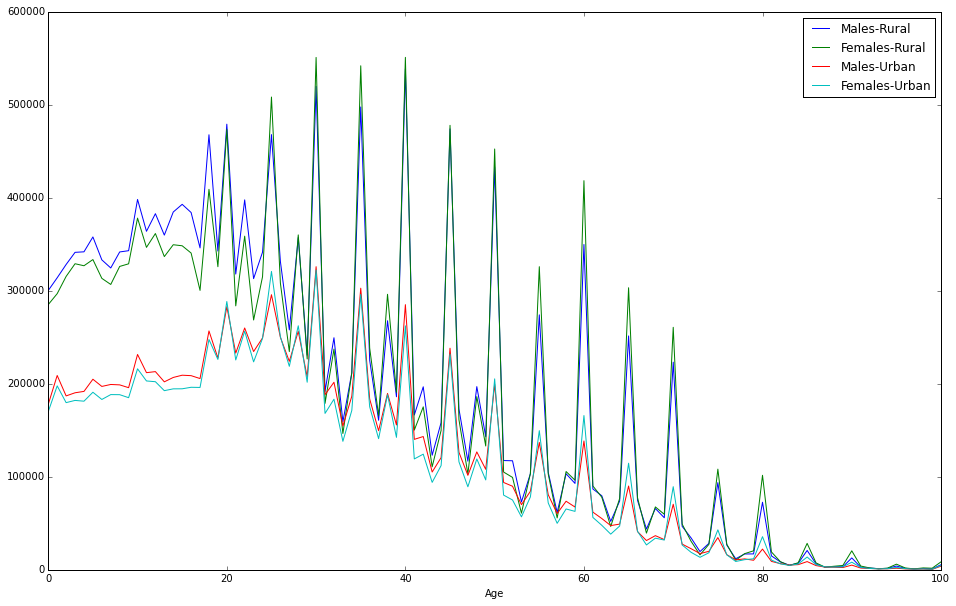

In [44]:
kar_graph = excel_kar_df.set_index("Age").plot(figsize=(16,10))
#kar_graph  = excel_kar_df.set_index("Age").plot(figsize=(16,10),subplots=True)
#kar_graph = excel_kar_df.set_index("Age").plot(figsize=(16,10),subplots=True,ylim=(0,600000))
plt.savefig("kar_graph.jpeg")

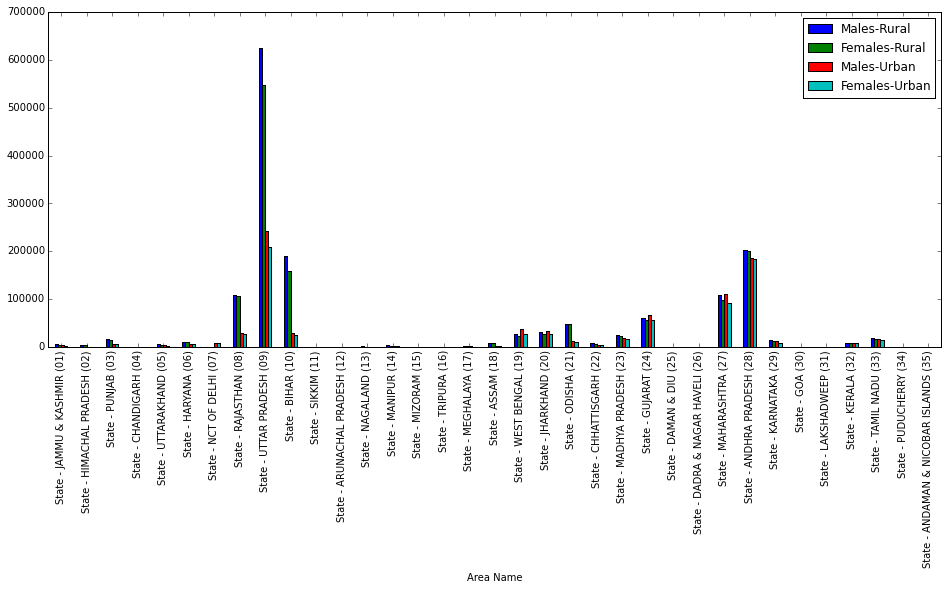

In [49]:
excel_df_age_ns = excel_df[excel_df["Age"] == "Age not stated"][["Area Name","Males-Rural","Females-Rural","Males-Urban","Females-Urban"]]
excel_df_age_ns = excel_df_age_ns[excel_df_age_ns["Area Name"] != "India"]
excel_df_age_ns = excel_df_age_ns.set_index("Area Name")
age_graph = excel_df_age_ns.plot(kind='bar',figsize=(16,6))

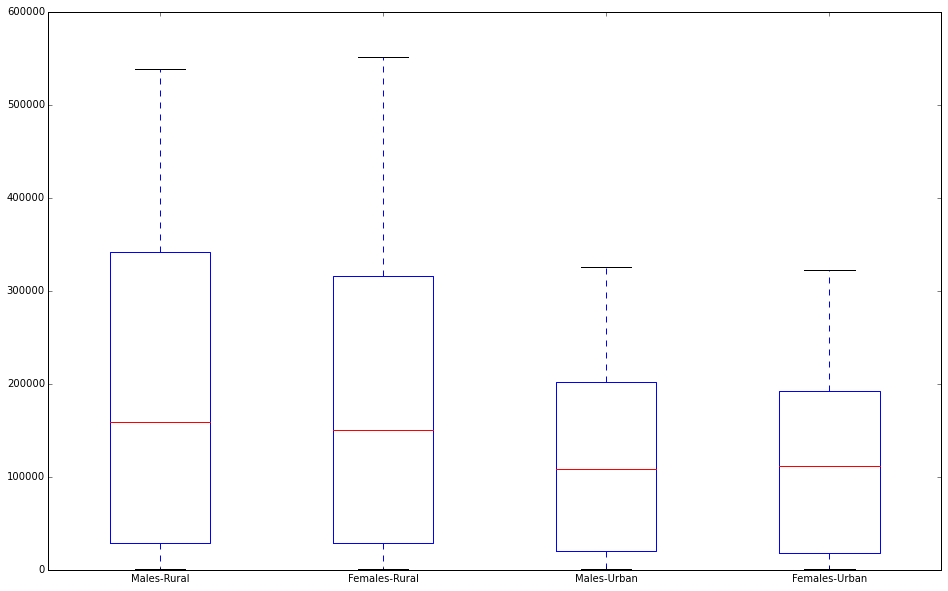

In [51]:
kar_age_graph = excel_kar_df.set_index("Age").plot(figsize=(16,10),kind='box')

In [310]:
excel_kar_df.describe()

,Age,Males-Rural,Females-Rural,Males-Urban,Females-Urban
count,101.000000,101.000000,101.000000,101.000000,101.000000
mean,50.000000,187281.198020,183446.584158,119067.782178,114654.396040
std,29.300171,159639.437129,157538.589132,95992.992138,93656.789443
min,0.000000,881.000000,1009.000000,406.000000,627.000000
25%,25.000000,28453.000000,28402.000000,19886.000000,18380.000000
50%,50.000000,159167.000000,149798.000000,108020.000000,112043.000000
75%,75.000000,341347.000000,315453.000000,202113.000000,192617.000000
max,100.000000,538633.000000,551024.000000,325945.000000,322299.000000


###Reading data using read_csv

####One of the very commonly used method is read_csv

In [52]:
# district rail fall data from 1951 to 2000
data = pd.read_csv("distirct_railfaill_1951_2000.csv")

In [53]:
data.head(2)

,STATE/UT,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3


In [54]:
data_kar = data[data["STATE/UT"]=="KARNATAKA"].copy()

In [55]:
data_kar = data_kar.drop("STATE/UT", axis=1)
data_kar = data_kar.set_index("DISTRICT")

In [56]:
data_kar = data_kar[[u'JAN', u'FEB', u'MAR', u'APR', u'MAY', u'JUN', u'JUL', u'AUG', u'SEP',
       u'OCT', u'NOV', u'DEC']]

In [57]:
data_kar.head()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
DISTRICT,,,,,,,,,,,,
UTTAR KANNADA,0.3,0.1,2.7,22.1,114.0,740.9,1053.8,667.7,258.5,155.1,44.1,11.2
DAKSHIN KANDA,1.9,0.7,6.4,39.8,180.9,977.2,1227.2,833.6,313.6,236.9,82.0,15.6
UDUPI,1.4,0.4,4.1,29.4,193.8,1081.0,1371.6,902.2,404.9,223.8,74.6,18.8
BELGAM,0.7,0.9,6.2,30.2,74.8,130.4,204.0,126.7,113.0,116.6,30.6,5.1
BIDAR,5.9,6.1,10.1,21.7,31.4,137.1,190.7,196.6,170.5,93.5,20.9,6.2


In [58]:
data_kar.describe()

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,2.026667,2.696667,7.163333,36.773333,88.166667,204.880000,280.700000,209.256667,164.076667,143.356667,44.350000,11.170000
std,1.259429,1.960029,3.636072,16.850723,40.632765,273.931535,374.960968,232.682348,64.369069,34.699406,16.686661,5.248458
min,0.300000,0.100000,2.500000,17.700000,31.400000,48.700000,49.300000,58.900000,99.500000,93.500000,20.800000,4.500000
25%,1.325000,0.925000,4.250000,24.075000,59.650000,72.250000,76.550000,87.525000,125.125000,116.450000,30.725000,7.000000
50%,1.750000,2.600000,6.350000,33.750000,78.400000,83.400000,97.650000,109.950000,148.000000,142.850000,44.750000,9.850000
75%,2.400000,4.050000,9.625000,44.875000,106.200000,129.050000,200.525000,166.000000,178.650000,157.550000,54.075000,14.750000
max,5.900000,6.700000,18.500000,89.800000,193.800000,1081.000000,1371.600000,902.200000,404.900000,236.900000,82.000000,24.300000


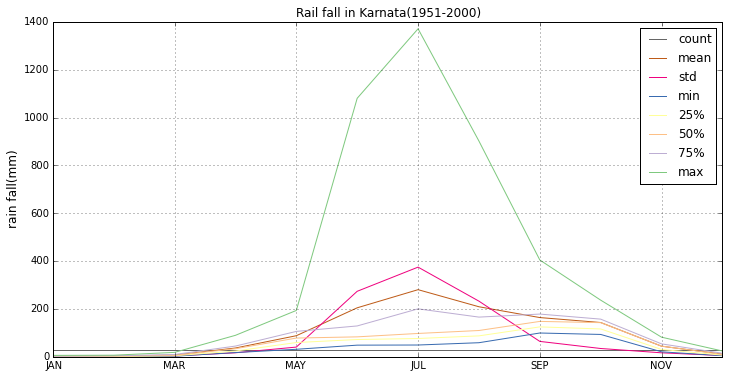

In [62]:
#data_kar.plot?
ax = data_kar.describe().T.plot(colormap=plt.cm.Accent_r ,figsize=(12,6),grid=True)
ax.set_ylabel("rain fall(mm)",fontdict={'size':12})
ax.set_title("Rail fall in Karnata(1951-2000)",fontdict={'size':12})

###Using default values while reading csv file

In [84]:
#pd.read_csv?
required_columns = ["Year","Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
glb_temp_df = pd.read_csv("GLB.Ts+dSST.txt",skiprows=7,usecols=required_columns,
                      skip_footer=12,engine='python',sep="\s+",na_values=['****','***'],
                      index_col=0
                      )

In [96]:
glb_temp_df.head()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
1880,-34,-27,-22,-30,-16,-24,-19,-12,-20,-19,-16,-21
1881,-13,-16,-2,-3,-3,-27,-12,-8,-18,-23,-28,-18
1882,3,4,-2,-24,-20,-32,-27,-11,-11,-25,-25,-37
1883,-38,-38,-12,-20,-20,-8,-3,-13,-19,-19,-28,-21
1884,-20,-14,-31,-36,-33,-36,-31,-24,-29,-25,-29,-25


In [85]:
glb_temp_df.loc["Year"]

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec


In [86]:
glb_temp_df = glb_temp_df[glb_temp_df["Jan"] != "Jan"]
glb_temp_df.shape

(136, 12)

In [87]:
glb_temp_df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011,45,44,57,60,47,54,70,69,52,60,50,48
2012,38,43,52,62,71,59,50,56,68,73,69,46
2013,62,52,60,48,56,61,53,61,73,61,75,61
2014,68,44,71,72,79,62,50,74,81,78,64,74
2015,75,80,84,71,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [88]:
glb_temp_df.dtypes

Jan    object
Feb    object
Mar    object
Apr    object
May    object
Jun    object
Jul    object
Aug    object
Sep    object
Oct    object
Nov    object
Dec    object
dtype: object

In [90]:
for col in glb_temp_df.columns:
    glb_temp_df[col] = glb_temp_df[col].ffill().astype(np.int64)

In [91]:
glb_temp_df.dtypes

Jan    int64
Feb    int64
Mar    int64
Apr    int64
May    int64
Jun    int64
Jul    int64
Aug    int64
Sep    int64
Oct    int64
Nov    int64
Dec    int64
dtype: object

In [92]:
glb_temp_df.tail()

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2011,45,44,57,60,47,54,70,69,52,60,50,48
2012,38,43,52,62,71,59,50,56,68,73,69,46
2013,62,52,60,48,56,61,53,61,73,61,75,61
2014,68,44,71,72,79,62,50,74,81,78,64,74
2015,75,80,84,71,79,62,50,74,81,78,64,74


In [97]:
glb_temp_df.sum(axis=1).head()

Year
1880   -260
1881   -171
1882   -207
1883   -239
1884   -333
dtype: int64

In [98]:
glb_temp_df.sum(axis=0).head()

Jan   -192
Feb    -22
Mar    176
Apr   -112
May   -198
dtype: int64

###Exploring groupby functionality

In [100]:
# Let us take the rain fall data
data.head(2)

,STATE/UT,DISTRICT,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
0,ANDAMAN And NICOBAR ISLANDS,NICOBAR,107.3,57.9,65.2,117.0,358.5,295.5,285.0,271.9,354.8,326.0,315.2,250.9,2805.2,165.2,540.7,1207.2,892.1
1,ANDAMAN And NICOBAR ISLANDS,SOUTH ANDAMAN,43.7,26.0,18.6,90.5,374.4,457.2,421.3,423.1,455.6,301.2,275.8,128.3,3015.7,69.7,483.5,1757.2,705.3


In [102]:
# first create the group by object
data_gb = data.groupby("STATE/UT")

In [103]:
type(data_gb)

pandas.core.groupby.DataFrameGroupBy

In [513]:
len(data_gb)

34

In [517]:
len(data["STATE/UT"].unique())

34

In [104]:
for name,group in data_gb:
    print(name)

ANDAMAN And NICOBAR ISLANDS
ANDHRA PRADESH
ARUNACHAL PRADESH
ASSAM
BIHAR
CHANDIGARH
CHATISGARH
DADAR NAGAR HAVELI
DAMAN AND DUI
DELHI
GOA
GUJARAT
HARYANA
HIMACHAL
JAMMU AND KASHMIR
JHARKHAND
KARNATAKA
KERALA
MADHYA PRADESH
MAHARASHTRA
MANIPUR
MEGHALAYA
MIZORAM
NAGALAND
ORISSA
PONDICHERRY
PUNJAB
RAJASTHAN
SIKKIM
TAMIL NADU
TRIPURA
UTTAR PRADESH
UTTARANCHAL
WEST BENGAL


In [105]:
#gettig one groups data
type(data_gb.get_group("KARNATAKA"))

pandas.core.frame.DataFrame

In [108]:
data_gb_mean = data_gb.mean()

In [109]:
type(data_gb_mean)

pandas.core.frame.DataFrame

In [111]:
data_gb_mean.head(2)

,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN+FEB,MAM,JJAS,OND
STATE/UT,,,,,,,,,,,,,,,,,
ANDAMAN And NICOBAR ISLANDS,61.233333,33.266667,30.800000,86.966667,358.833333,418.666667,390.566667,385.300000,421.733333,301.1,263.200000,159.733333,2911.400000,94.500000,476.600000,1616.266667,724.033333
ANDHRA PRADESH,6.321739,7.352174,10.095652,19.873913,48.765217,114.369565,185.365217,179.426087,160.373913,138.6,58.965217,15.565217,945.073913,13.673913,78.734783,639.534783,213.130435


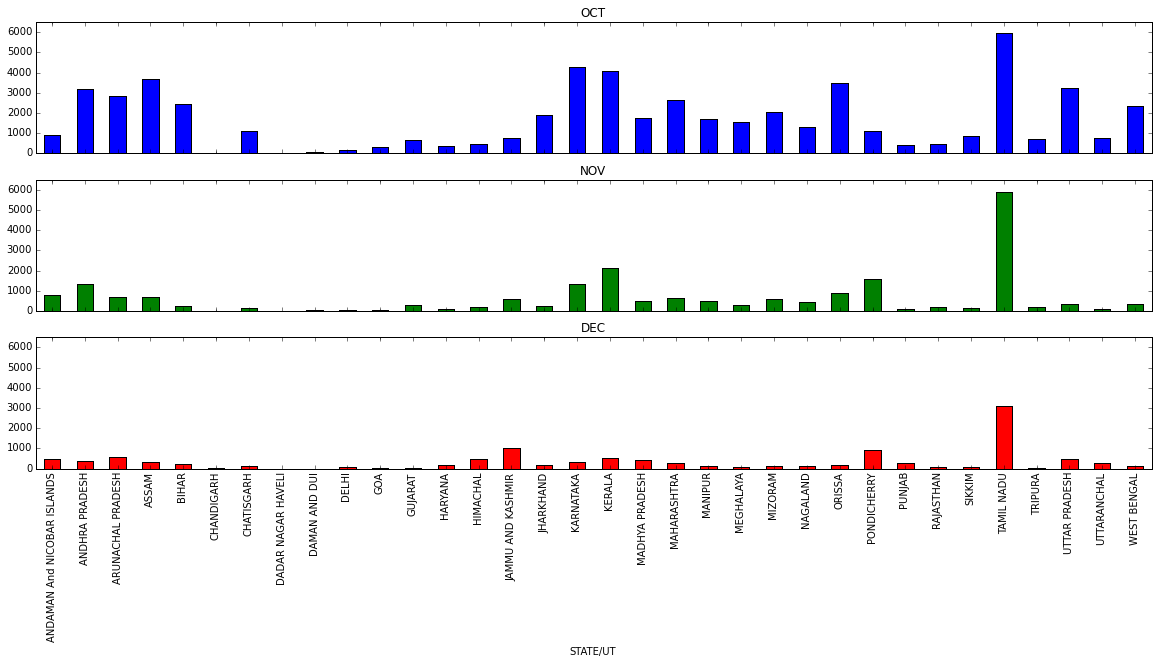

In [114]:
months_q1 = ["JAN","FEB","MAR"]
months_q2 = ["APR","MAY","JUN"]
months_q3 = ["JUL","AUG","SEP"]
months_q4 = ["OCT","NOV","DEC"]
#months = ["MAR","JUN","SEP","DEC"]
ax= data_gb[months_q4].sum().plot(figsize=(20,8),kind='bar',subplots=True,legend=False,ylim=(0,6500))

In [123]:
data_gb_quarter = data_gb.sum()

In [125]:
quarters = {'Q1':months_q1,'Q2':months_q2,'Q3':months_q3,'Q4':months_q4}
for quarter in quarters:
    #print quarters[quarter]
    data_gb_quarter[quarter] = (data_gb_quarter[quarters[quarter]]).mean(axis=1)

In [127]:
data_gb_quarter[['Q1','Q2','Q3','Q4']].head()

,Q1,Q2,Q3,Q4
STATE/UT,,,,
ANDAMAN And NICOBAR ISLANDS,125.300000,864.466667,1197.600000,724.033333
ANDHRA PRADESH,182.233333,1403.066667,4026.266667,1634.000000
ARUNACHAL PRADESH,1664.000000,5689.633333,6894.166667,1364.866667
ASSAM,1126.900000,8822.900000,10584.133333,1555.300000
BIHAR,408.966667,3006.066667,10813.500000,978.500000


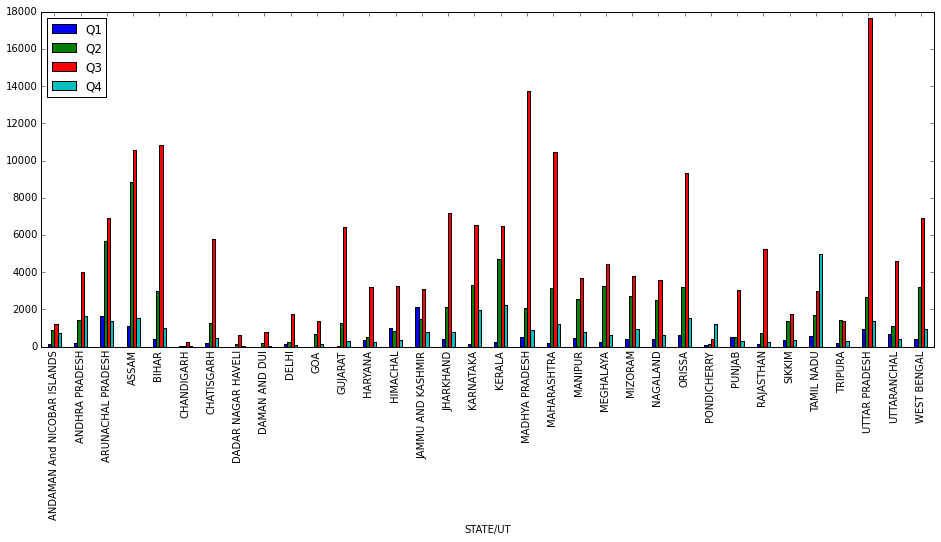

In [130]:
ax = data_gb_quarter[['Q1','Q2','Q3','Q4']].plot(kind='bar',figsize=(16,6))